In [22]:
from typing import Dict, List
import os
import sys
from dotenv import load_dotenv
import glob
import gc
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.preproc import get_roi_and_network_ids
from utils.coflt import permutation_test

In [2]:
load_dotenv()
base_dir = os.getenv("BASE_DIR")
data_dir = os.path.join(base_dir, 'data') # type: ignore
parcellation_dir = os.path.join(data_dir, "fmriprep", "yan_parcellations")
output_dir = os.path.join(base_dir, "output", "cofluctuation_LOO") # type: ignore
figure_dir = os.path.join(output_dir, "figures")
os.makedirs(figure_dir, exist_ok=True)

In [3]:
n_parcel = 400

In [5]:
with open(os.path.join(output_dir, f"permutation_test_affair-paranoia_{n_parcel}parcel_p.pkl"), "rb") as f:
    diff, p_value_ntw, p_value_mtx_ntw = pickle.load(f)

In [7]:
parcellation = np.load(os.path.join(data_dir, "fmriprep", "yan_parcellations", f"yan_kong17_{n_parcel}parcels.npz"))
_, _, _, networknames_idx_dict = get_roi_and_network_ids(parcellation, n_parcel)
# Generate network pairs for plotting
networknames = list(networknames_idx_dict.keys())
network_pairs = [f"{networknames[i]} x {networknames[j]}" for i in range(len(networknames)) for j in range(i, len(networknames))]

Number of ROIs: 44
Number of ROIs separated by networks: 126
Number of ROIs separated by hemispheres: 227
Number of networks: 17


## Group Differences in 153 Network Pairs X 24 Events

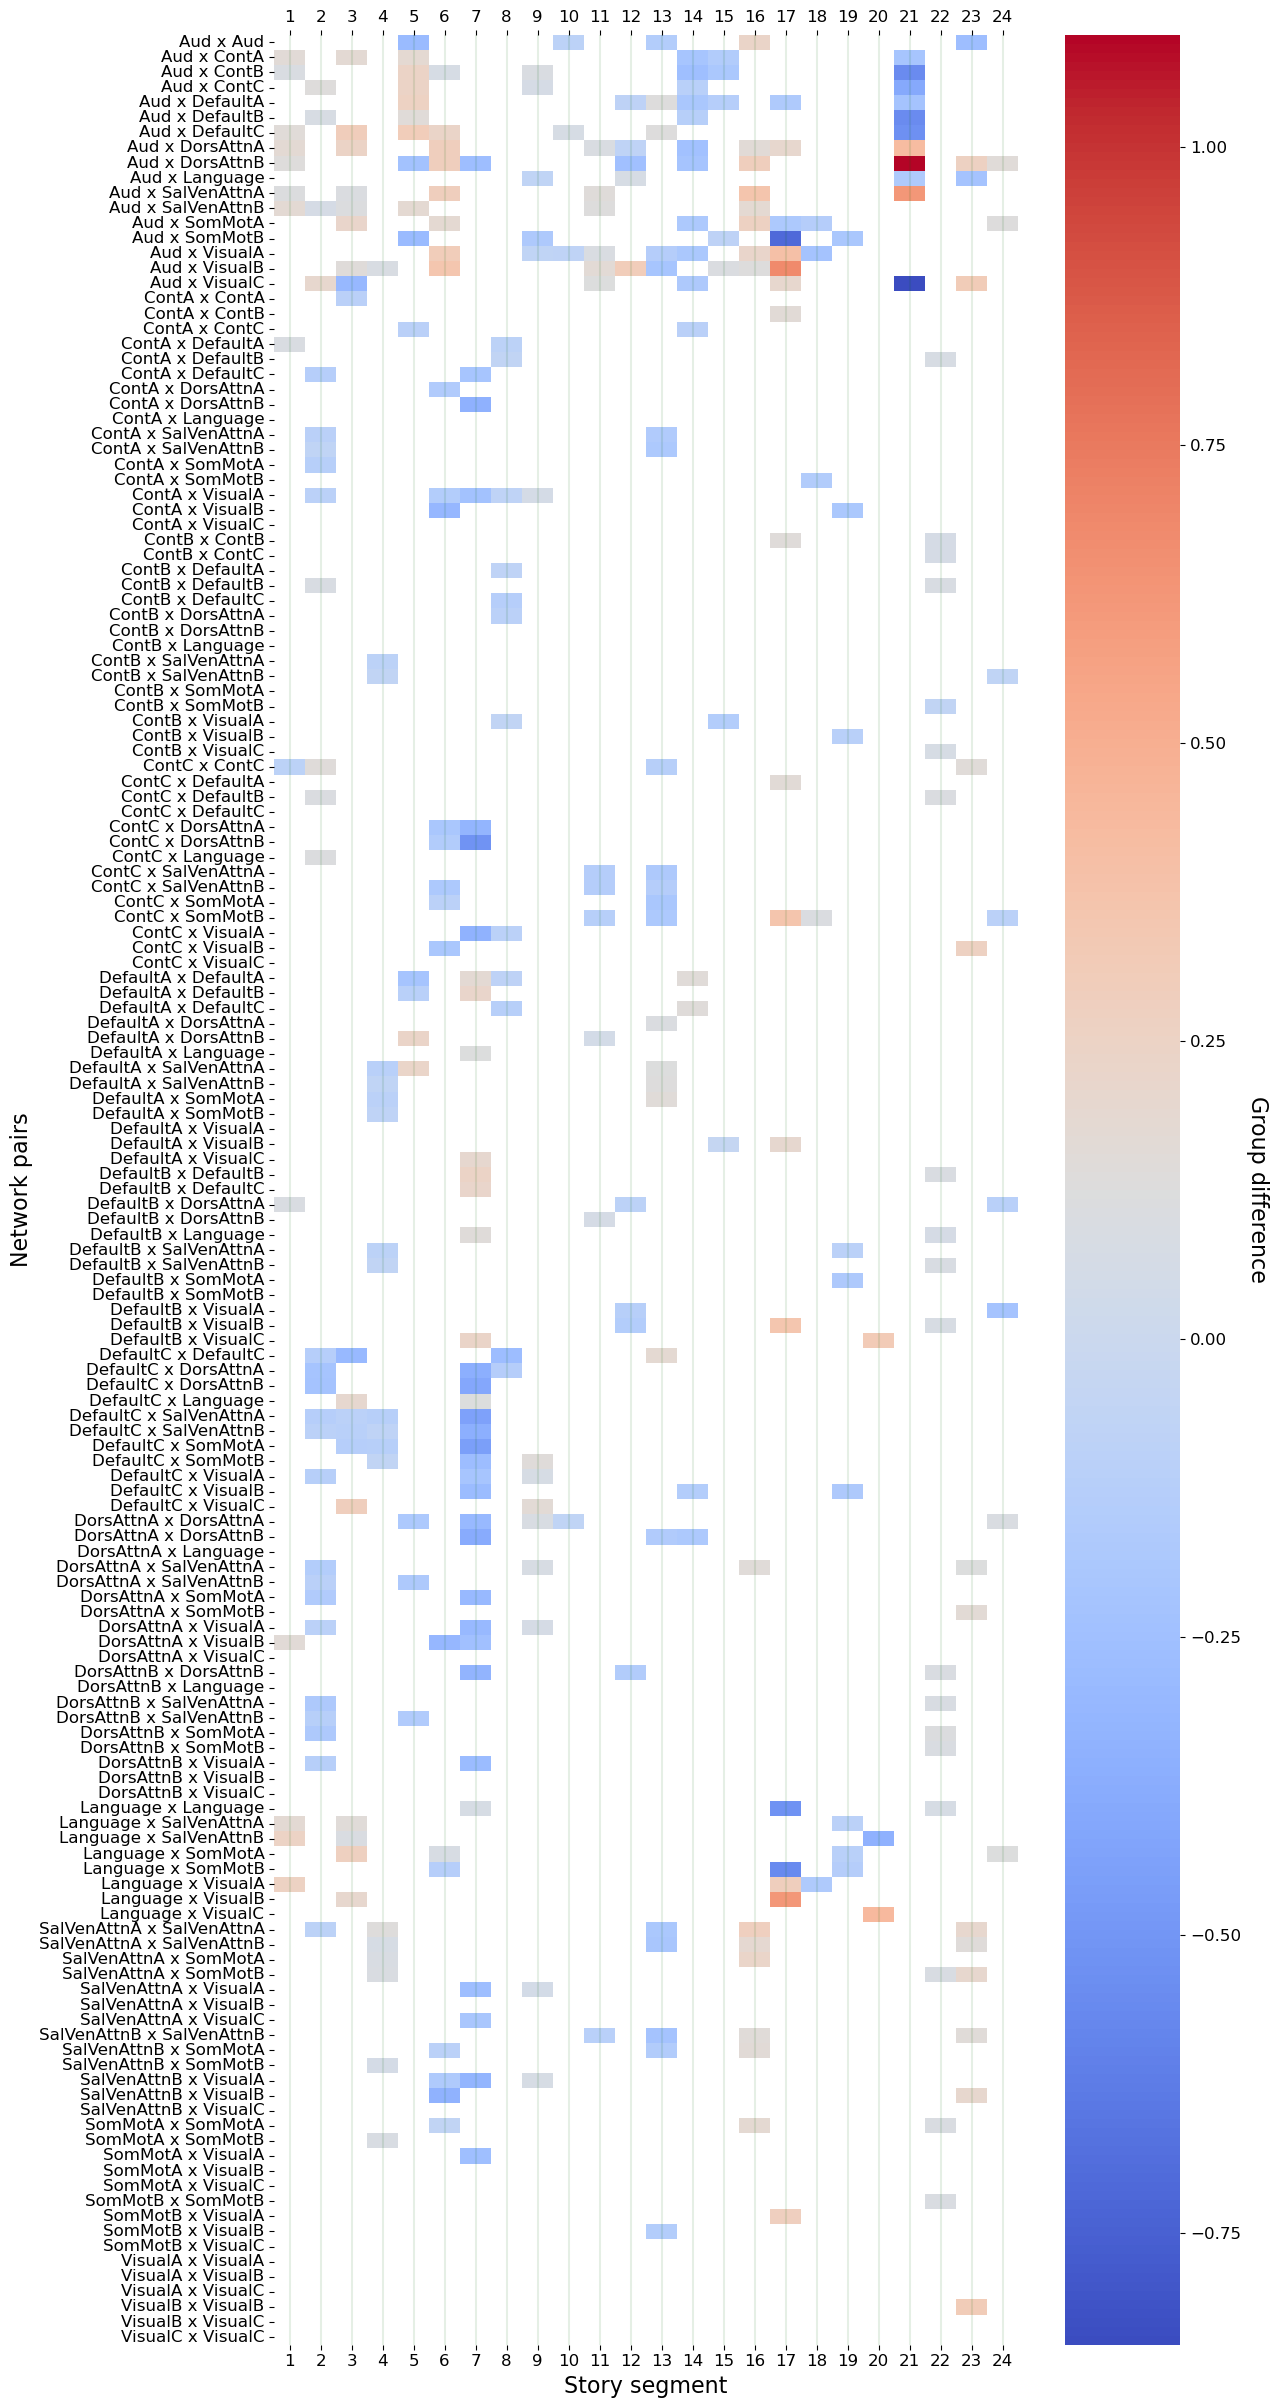

In [20]:
plt.figure(figsize=(12, 30))
n_seg = p_value_ntw.shape[1]
ax = sns.heatmap(np.nanmean(diff, axis=0), cmap="coolwarm", mask=p_value_ntw >= 0.05, yticklabels=network_pairs)
plt.xticks(np.arange(0.5, n_seg+0.5, 1), np.arange(1, n_seg+1, 1))
plt.xlabel("Story segment", fontsize=16)
plt.ylabel("Network pairs", fontsize=16)

# Set axis font size
plt.tick_params(axis='both', which='major', labelsize=12)
cbar = plt.gcf().axes[-1]
cbar.tick_params(labelsize=12)
# colorbar text size
cbar.set_ylabel('Group difference', rotation=270, fontsize=16, labelpad=20)

# X-axis ticks at the top and the bottom
ax.xaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(labeltop=True, labelbottom=True)

# Add vertical lines at each x-tick
for x in np.arange(0.5, n_seg+0.5, 1):
    plt.axvline(x, color='darkgreen', alpha=0.1)

plt.show()

- Event 1: When the phone rang, the gray-haired man asked the girl, with quite some little deference, if she would rather for any reason he didn't answer it. The girl heard him as if from a distance, and turned her face toward him, one eye on the side of the lightÑclosed tight, her open eye very, however disingenuously, large, and so blue as to appear almost violet.The grayhaired man asked her to hurry up, and she raised up on her right forearm just quickly enough so that the movement didn't quite look perfunctory.

- Event 2: She cleared her hair back from her forehead with her left hand and said, "God. I don't know. I mean what do you think?" The gray-haired man said he didn't see that it made a helluva lot of difference one way or the other, and slipped his left hand under the girl's supporting arm, above the elbow, working his fingers up, making room for them between the warm surfaces of her upper arm and chest wall. He reached for the phone with his right hand.

- Event 3: "Hello?" he said resonantly into the phone. The girl stayed propped up on her forearm and watched him. Her eyes, more just open than alert or speculative, reflected chiefly their own size and color.

- Event 4: A man's voice stone dead, yet somehow rudely, almost obscenely quickened for the occasion came through at the other end: "Lee? Did I wake you?" The gray-haired man glanced briefly left, at the girl. "Who's that?" he asked. "Arthur?" "YeahÑI wake you?" "No, no. I'm in bed, reading. Anything wrong?" "The reason I called, Lee, did you happen to notice when Joanie was leaving? ', 'Did you happen to notice if she left with the Ellenbogens, by any chance?" The gray-haired man looked left again, but high this time, away from the girl, who was now watching him rather like a young, blue-eyed Irish policeman. "No, I didn't, Arthur," he said,', 'his eyes on the far, dim end of the room, where the wall met the ceiling.', '"Uh, didn't she leave with you?"', '"No. Christ. ', 'You didn't see her leave at all, then?"', '"Well, no, as a matter of fact, I didn't, Arthur," the gray-haired man said. ', '"Why? What's up? Joanie lost?" "Oh, Christ. Who knows? I don't know. You know her when she gets all tanked up and rarin' to go. I don't know. She may have just " "You call the Ellenbogens?" the gray-haired man asked. "Yeah, yeah. They're not home yet. I don't know. Christ,", "I'm not even sure she left with them. ", 'I know one thing. I know one goddamn thing. I'm through beating my brains out. I mean it. I really mean it this time. I'm through. Five years. Christ."

- Event 5: "All right, all right, try to take it a little easy, now, Arthur," the gray-haired man said.

- Event 6: He turned and gave the girl a sign, with two fingers near his mouth, that he wanted a cigarette. "In the first place, if I know the Ellenbogens, they probably all hopped in a cab and went down to the Village for a couple of hours. All three of them'll probably barge " "I have a feeling she went to work on some bastard in the kitchen. I just have a feeling.
- Event 7: She always starts necking some bastard in the kitchen when she gets tanked up. I'm through. I swear to God I mean it this time. Five goddamn"

- Event 8: "Where are you now, Arthur?" the gray-haired man asked. "Home?" He straightened his back so that the girl could reach behind him for the cigarettes. "Yeah. Home. Home sweet home. Christ." "Look, Arthur. You want my advice?" he said. Absently, he took his left hand out from between the girl's upper arm and chest wall. "Get in bed and relax. Tell the truth. Is it going to do you any good to sit around and stew?" "Yeah, I know. I wouldn't even worry, for Chrissake, but you can't trust her! I swear to God. I swear to God you can't." 

- Event 9: The gray-haired man turned his head to see what the girl was doing.', 'She had picked up the ashtray and was putting it between them. ', '"You know what I do? You know what I do? ', "I'm ashamed toÑI'm ashamed to tell you, but you know what I very nearly goddamn do every night? When I get home?", 'You want to know?"', '"Arthur, listen, this isn'tÑ"', '"Wait a secondÑI'll tell ya,', 'God damn it.', ' I practically have to keep myself from opening every goddam closet door in the apartmentÑI swear to God.', ' Every night I come home, I half expect to find a bunch of bastards hiding all over the place."', '"All right. All right.', 'Let's try to take it a little easy, Arthur," the gray-haired man said. ', 'He turned his head toward the girl, perhaps to show her how forbearing, even stoic, his countenance was. ', 'But the girl missed seeing it.', 'She had just overturned the ashtray with her knee and was rapidly, with her fingers, brushing the spilled ashes into a little pick-up pile;', 'her eyes looked up at him a second too late.

- Event 10: '"In the first place," he said into the phone, "I've told you many, many times, Arthur, that's exactly where you make your biggest mistake.', 'You know what you do? You actually go out of your way to torture yourself. ', 'As a matter of fact, you actually inspire JoanieÑ"', 'He broke off. ', '"You're bloody lucky she's a wonderful kid.', 'I mean it.', 'You give that kid absolutely no credit for having any good tasteÑor brains, for Chrissake, for that matterÑ" ', '"Brains. Jesus, if you knew how funny that was. ', " She thinks she's a goddamn intellectual.", "And, that's the funny part, that's the hilarious part.", "She reads the theatrical page, and she watches television till she's practically blindÑso she's an intellectual.", "You know who I'm married to?", "I'm married to the greatest living undeveloped, undiscovered actress, novelist, psychoanalyst, and all-around goddam unappreciated celebrity-genius in New York.", "You didn't know that, did you? ", 'Christ, it's so funny I could cut my throat."

- Event 11: '"In the first place," the gray-haired man said, and slowly moved his hand and then caressed a little lock that rested on the girlÕs forehand, "for a hell of an intelligent guy, you're about as tactless as it's humanly possible to be." "We're mismated, that's all. That's the whole simple story. We're just mismated as hell. She doesn't respect me. She doesn't even love me, for God's sake. She bought me a suit once, with her own money. I tell you about that?" "No, I " The gray-haired man listened another moment. Then, abruptly, he turned toward the girl. The look he gave her, though only glancing, fully informed her what was suddenly going on at the other end of the phone.

- Event 12: "Now, Arthur, listen. I say this in all sincerity. Will you get undressed and get in bed, like a good guy? And relax? Joanie will probably be there in about two minutes." He listened. "Arthur? You hear me?" "Yeah. I hear you. Listen. I've kept you awake all night anyway. Could I come over to your place for a drink? Would you mind?"

- Event 13: The gray-haired man straightened his back and placed the flat of his free hand on the top of his head, and said, "Now, do you mean?" "Yeah. I mean if it's all right with you. I'll only stay a minute. I'd just like to sit down somewhere and I don't know. Would it be all right?" "Yeah, uh,

- Event 14: but the point is I don't think you should, Arthur," the gray-haired man said, lowering his hand from his head. "I mean you're, you're more than welcome to come,', 'but I honestly think you should just sit tight and relax till Joanie waltzes in.

- Event 15: What you want to be, you want to be right there on the spot when she waltzes in. Am I right, or not?"

- Event 16: "Yeah. I don't know. I swear to God, I don't know." "Well, I do, I honestly do," the gray-haired man said. "Look. Why don't you hop in bed now, and relax, and then later, if you feel like it, give me a ring. I mean if you feel like talking. And don't worry. That's the main thing. Hear me? Will you do that now?" "All right."

- Event 17: The gray-haired man continued for a moment to hold the phone to his ear, then lowered it into its cradle.

- Event 18: "What did he say?" the girl immediately asked him. He picked his cigarette out of the ashtrayÑthat is, selected it from an accumulation of smoked and half-smoked cigarettes. He dragged on it and said, "He wanted to come over for a drink." "God! What did you say?" said the girl. "You heard me," the gray-haired man said, and looked at her.

- Event 19: "You were wonderful. Absolutely marvellous," the girl said, watching him. "Well," the gray-haired man said, "it's a tough situation. I don't know how marvelous I was." "You were, you were wonderful," the girl said.

- Event 20: The gray-haired man looked at her. "Well, it's a very, very tough situation. The guy's obviously going through absolute..." The phone suddenly rang.

- Event 21: The gray-haired man said "Christ!"

- Event 22: but picked it up before the second ring. "Hello?" he said into it. "Lee? Were you asleep?" "No, uh, no." "Listen, I just thought you'd want to know. Joanie just barged in." "What?" said the gray-haired man, and bridged his left hand over his eyes, though the light was behind him. "Yeah, she just barged in. About ten seconds after I spoke to you. I just thought I'd give you a ring while she's in the john. Listen, thanks a million, Lee. I mean it. You weren't asleep, were you?" "No, no, I was just No, no," the gray-haired man said, leaving his fingers bridged over his eyes. He cleared his throat. "Yeah. What happened was, apparently Leona got stinking and then had a goddam crying jag, and Bob wanted Joanie to go out and grab a drink with them somewhere. Anyway, so she's home. What a rat race. Honest to God, I think it's this goddamn New York.  What I think maybe we'll do, if everything goes along all right, we'll get ourselves a little place in Connecticut maybe.  Not too far out, necessarily, but far enough that we can lead a normal goddamn life. I mean she's crazy about plants and all that stuff. She'd probably go mad if she had a garden, if she had her own goddam garden and stuff. Know what I mean? I mean except you who do we know in New York except a bunch of neurotics? It's bound to undermine even a normal person sooner or later.  Know what I mean?"

- Event 23: "Listen, Arthur," the gray-haired man interrupted, taking his hand away from his face, "I have a helluva headache all of a sudden. I don't know where I got the, the bloody thing from. You mind if we cut this short? I'll talk to you in the morningÑall right?" He listened for another moment, then hung up.

- Event 24: Again the girl immediately spoke to him, but he didn't answer her. He picked a burning cigarette the girl's out of the ashtray and started to bring it to his mouth, but it slipped out of his fingers. The girl tried to help him retrieve it before anything was burned,but he told her to just sit still, for Chrissake,', 'and she pulled back her hand.


In [23]:
# convert np.nanmean(diff, axis=0) to a dataframe
# the columns are the story segments, the rows are the network pairs
# use the network pairs as the index
# use p_value_ntw as the mask, set the cells where p_value_ntw >= 0.05 to np.nan
df = pd.DataFrame(np.nanmean(diff, axis=0), index=network_pairs, columns=np.arange(1, n_seg+1, 1))
df[p_value_ntw >= 0.05] = np.nan
# Calculate counts before adding them to the dataframe
col_affair_count = (df > 0).sum(axis=1)
col_paranoia_count = (df < 0).sum(axis=1)
col_count = df.count(axis=1)
# Add the counts to the dataframe
df["affair_count"] = col_affair_count
df["paranoia_count"] = col_paranoia_count
df["count"] = col_count

row_affair_count = (df > 0).sum(axis=0)
row_paranoia_count = (df < 0).sum(axis=0)
row_count = df.count(axis=0)
df.loc["affair_count"] = row_affair_count
df.loc["paranoia_count"] = row_paranoia_count
df.loc["count"] = row_count

## Significant Network pairs by Event

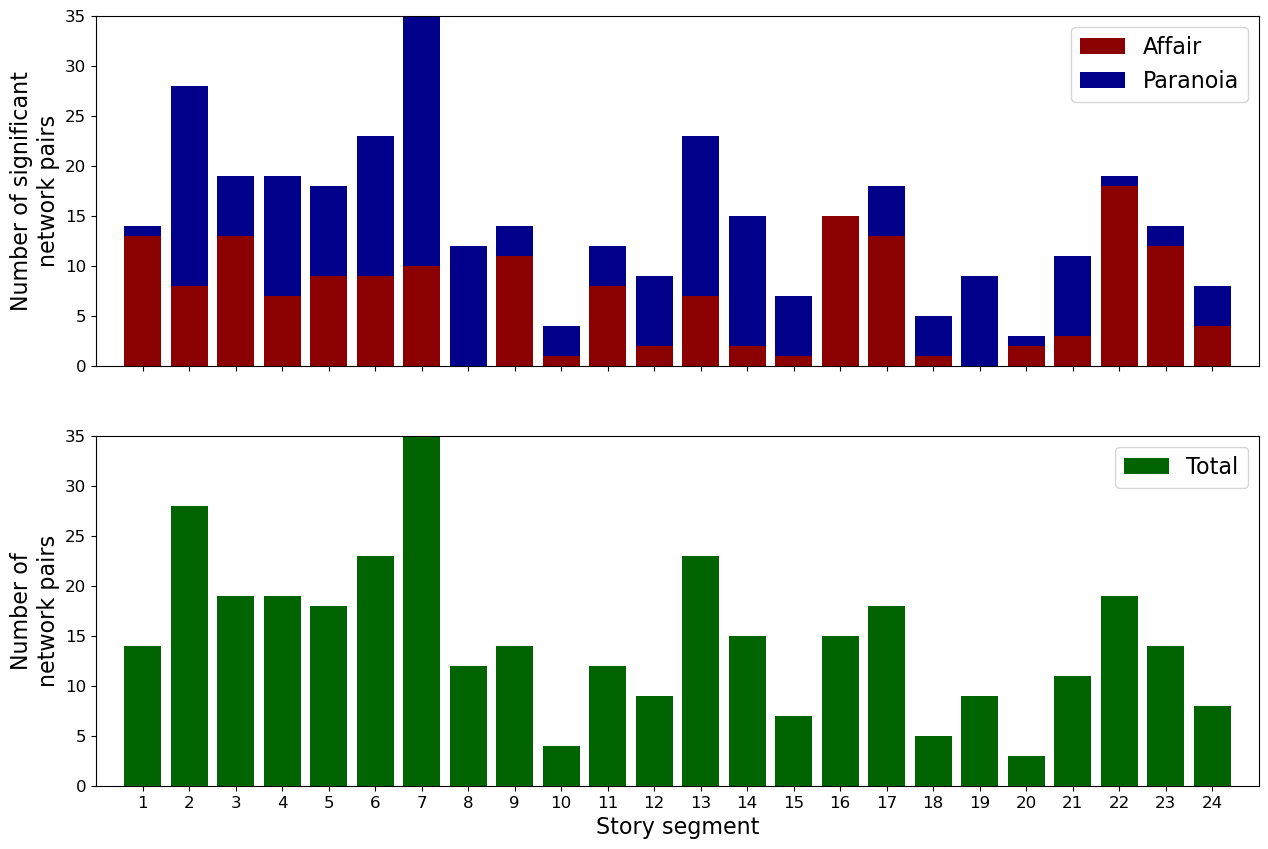

In [24]:
# plot the row "affair_count" and "paranoia_count" in a barplot
# plot the row "count" in a barplot too
# put the two barplots together with the same x-axis
# set the y-axis range as 0 to 35
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Create the 'affair_count' bars
bars1 = ax[0].bar(np.arange(1, n_seg+1, 1), df.loc["affair_count", :n_seg], color="darkred")

# Create the 'paranoia_count' bars, on top of the 'affair_count' bars
bars2 = ax[0].bar(np.arange(1, n_seg+1, 1), df.loc["paranoia_count", :n_seg], bottom=df.loc["affair_count", :n_seg], color="darkblue")
# Use matplotlib for the second plot as well
bars3 = ax[1].bar(np.arange(1, n_seg+1, 1), df.loc["count", :n_seg], color="darkgreen")

# add legend
ax[0].legend((bars1, bars2), ("Affair", "Paranoia"), fontsize=16)
ax[1].legend((bars3,), ("Total",), fontsize=16)
ax[0].set_ylabel("Number of significant\nnetwork pairs", fontsize=16)
ax[1].set_ylabel("Number of\nnetwork pairs", fontsize=16)
ax[1].set_xlabel("Story segment", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
ax[0].set_xlim([0, n_seg+1])
ax[1].set_xlim([0, n_seg+1])
# set xticks
ax[0].set_xticks(np.arange(1, n_seg+1, 1))
ax[1].set_xticks(np.arange(1, n_seg+1, 1))
# remove margin for x-axis
ax[0].set_ylim(0, 35)
ax[1].set_ylim(0, 35)
plt.show()

## Significant Events by Network Pairs

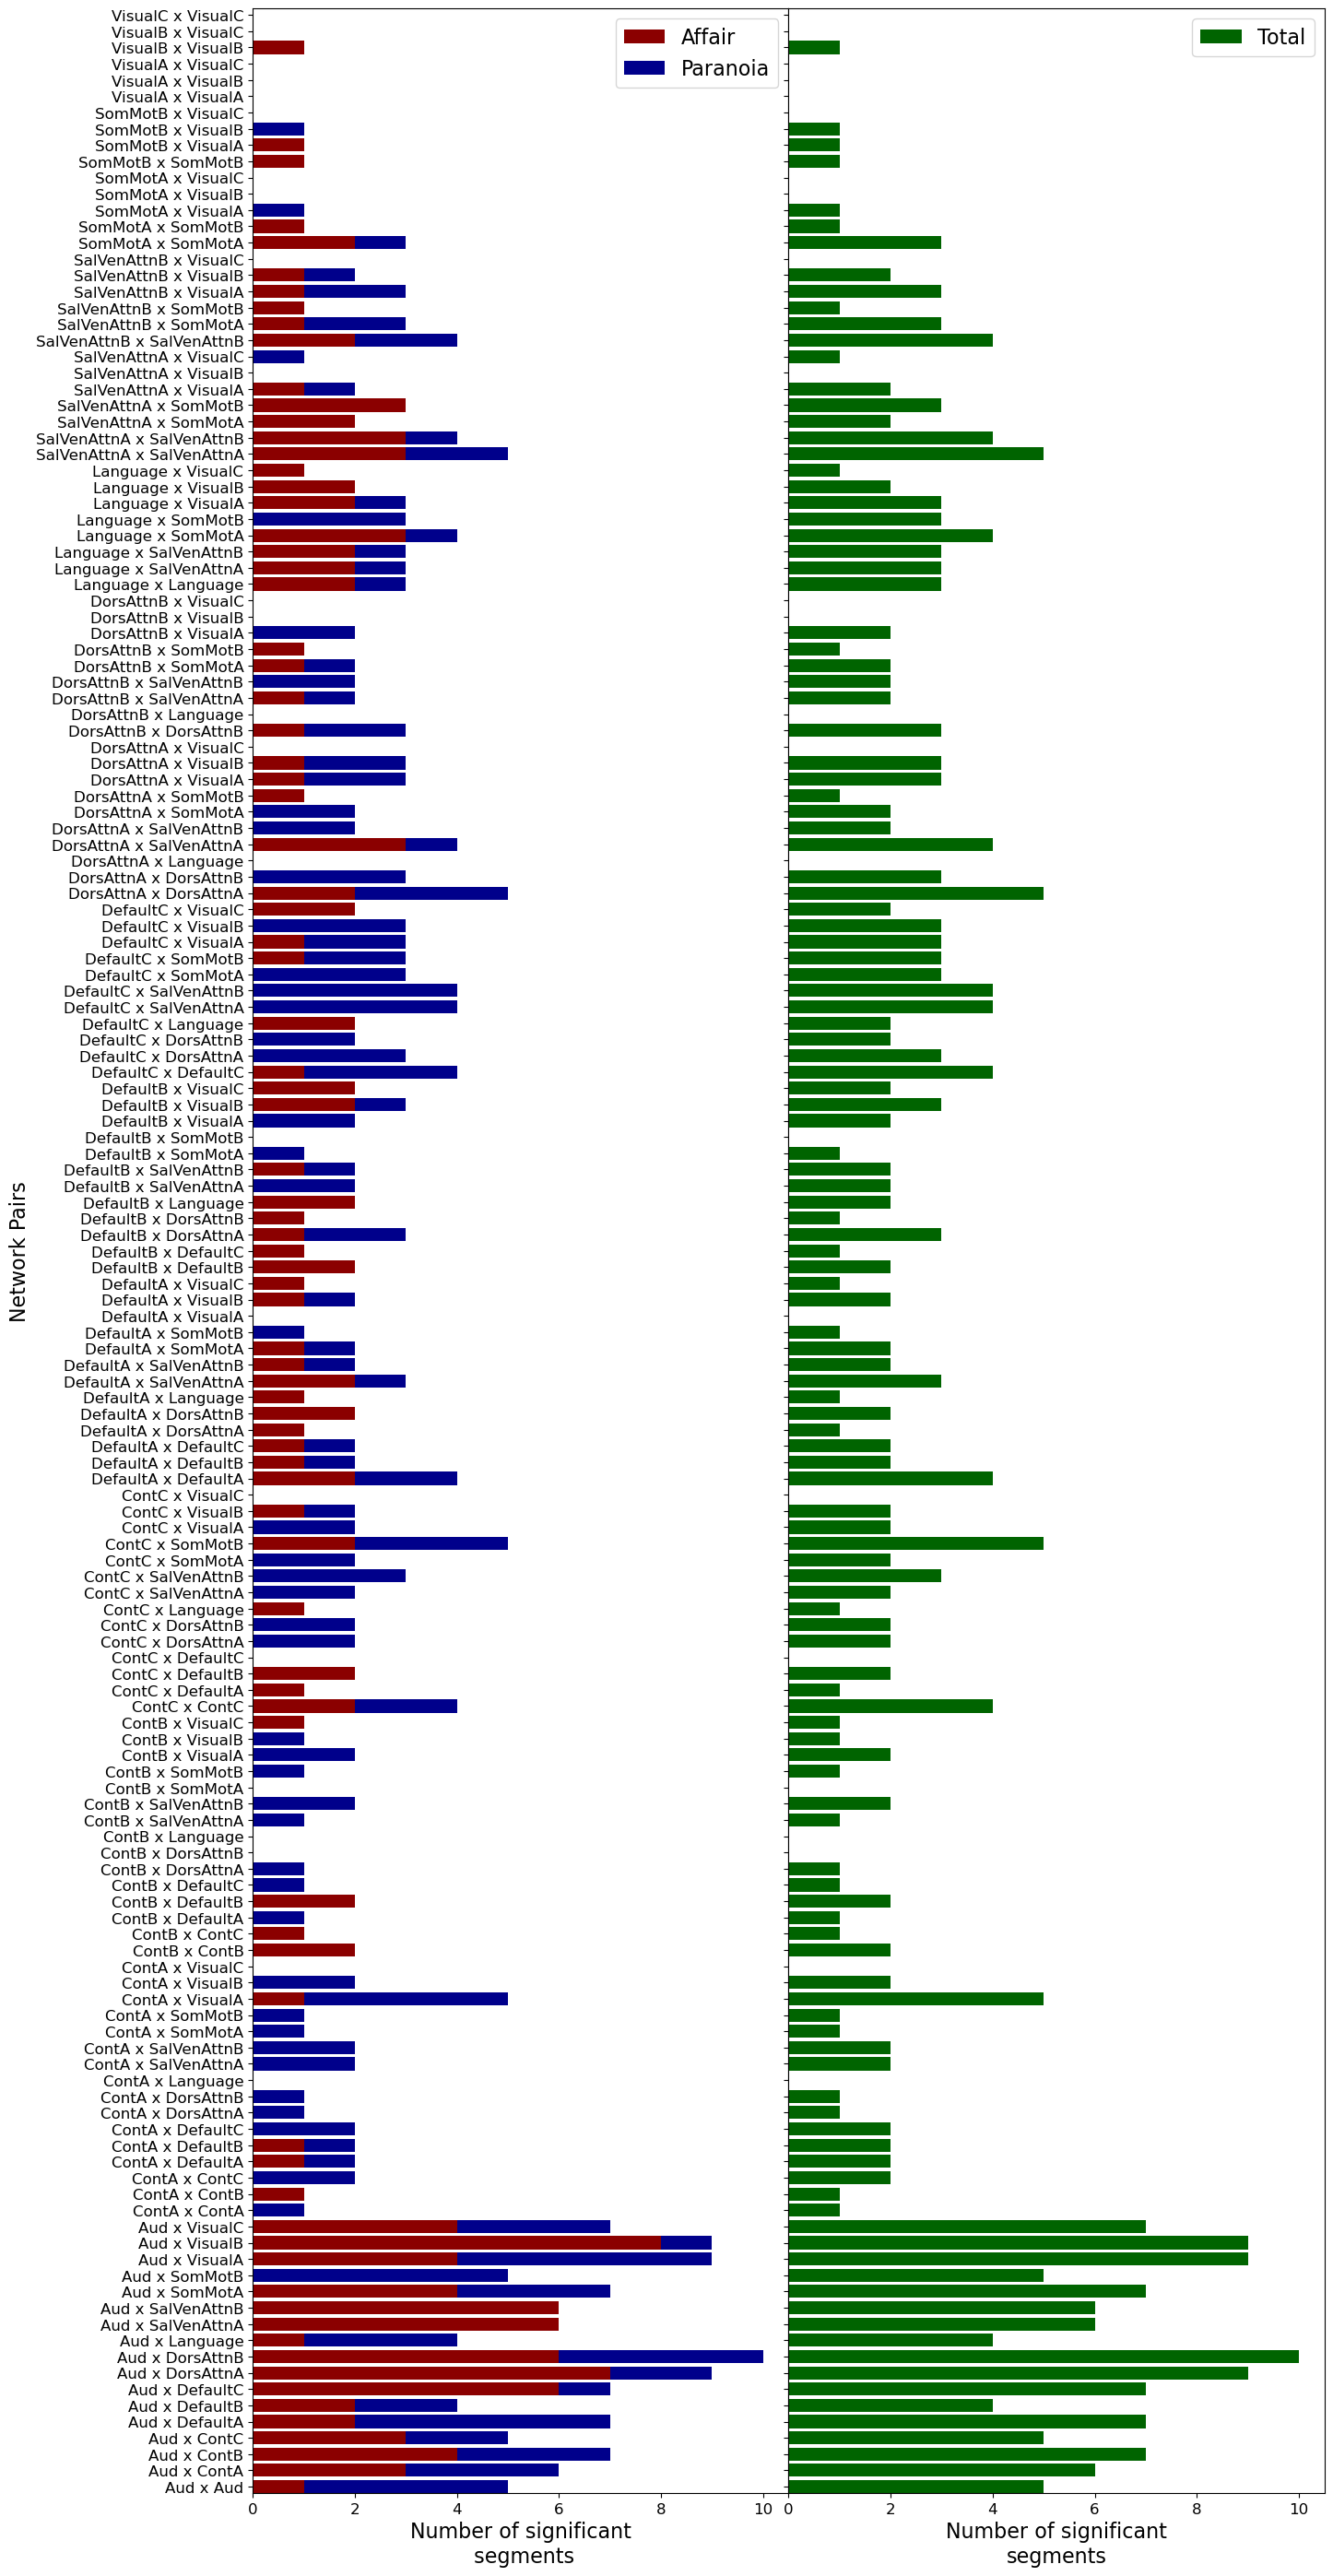

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15, 35), sharey=True)

# Exclude the last 3 rows
df_plot = df.iloc[:-3]

# Create the 'affair_count' bars
bars1 = ax[0].barh(np.arange(len(df_plot.index)), df_plot["affair_count"], color="darkred")

# Create the 'paranoia_count' bars, on top of the 'affair_count' bars
bars2 = ax[0].barh(np.arange(len(df_plot.index)), df_plot["paranoia_count"], left=df_plot["affair_count"], color="darkblue")

# Use matplotlib for the second plot as well
bars3 = ax[1].barh(np.arange(len(df_plot.index)), df_plot["count"], color="darkgreen")

# add legend
ax[0].legend((bars1, bars2), ("Affair", "Paranoia"), fontsize=16)
ax[1].legend((bars3,), ("Total",), fontsize=16)
ax[0].set_xlabel("Number of significant\n segments", fontsize=16)
ax[1].set_xlabel("Number of significant\nsegments", fontsize=16)
ax[0].set_ylabel("Network Pairs", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[1].tick_params(axis='both', which='major', labelsize=12)
# ax[0].set_xlim([0, 35])
# ax[1].set_xlim([0, 35])

# Set y-ticks and y-tick labels
ax[0].set_yticks(np.arange(len(df_plot.index)))
ax[0].set_yticklabels(df_plot.index)
ax[1].set_yticks(np.arange(len(df_plot.index)))
ax[1].set_yticklabels(df_plot.index)

# Remove margin between plots
plt.subplots_adjust(wspace=0)
# Remove margin from y-axis
ax[0].margins(y=0)
ax[1].margins(y=0)

plt.show()

## Group Difference per Event Segment

In [31]:
def to_matrix(matrix: np.ndarray, n_dim: int) -> np.ndarray:
    assert len(matrix.shape) == 2, "input matrix should be 2D"
    assert matrix.shape[0] == n_dim * (n_dim + 1) // 2, "Size of input matrix does not match n_dim"

    matrix_new = np.zeros((n_dim, n_dim, matrix.shape[1]))  # initialize empty matrix

    for h in range(matrix.shape[1]):
        triu_idx = np.triu_indices(n_dim, k=0)
        matrix_new[triu_idx[0], triu_idx[1], h] = matrix[:, h]  # fill upper triangle

    for i in range(n_dim):
        for j in range(i+1, n_dim):  # don't include diagonal
            matrix_new[j, i, :] = matrix_new[i, j, :]  # fill lower triangle with upper triangle values

    return matrix_new

In [32]:
n_dim = 17
diff_mtx_ntw = to_matrix(np.nanmean(diff, axis=0), n_dim)

Segment: 1


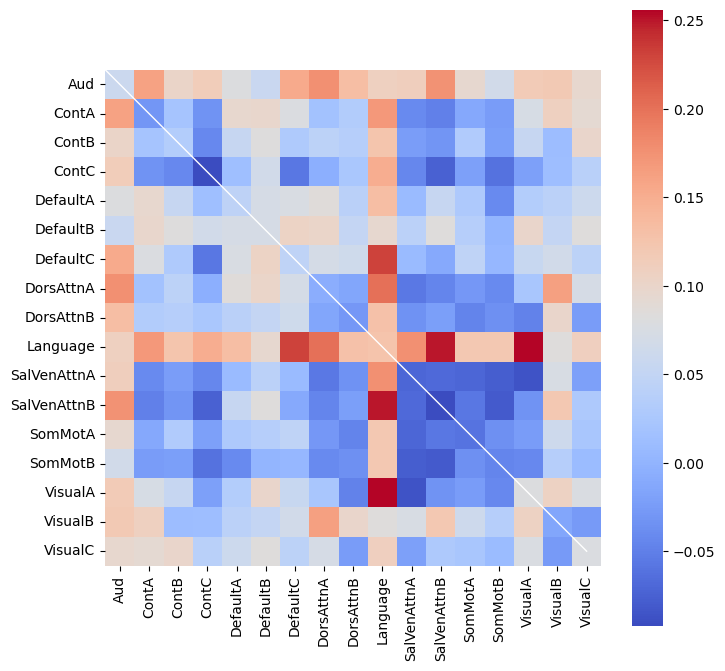

Segment: 2


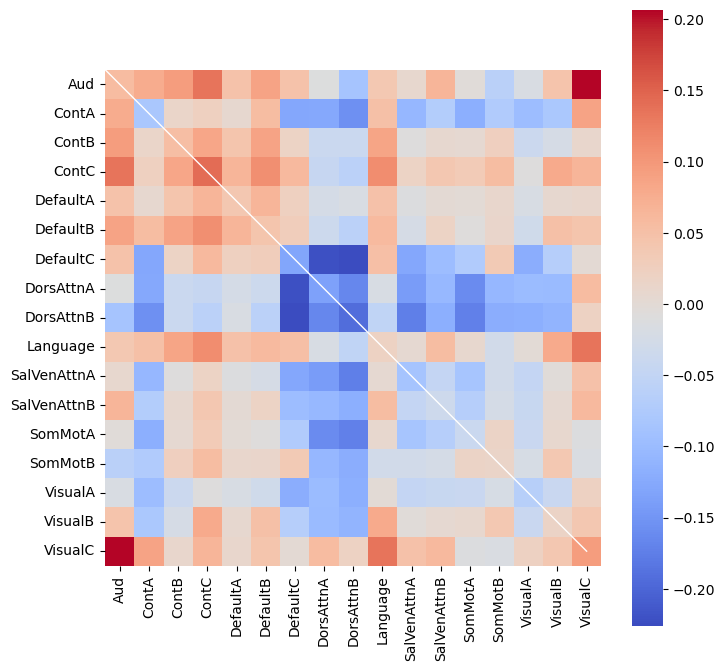

Segment: 3


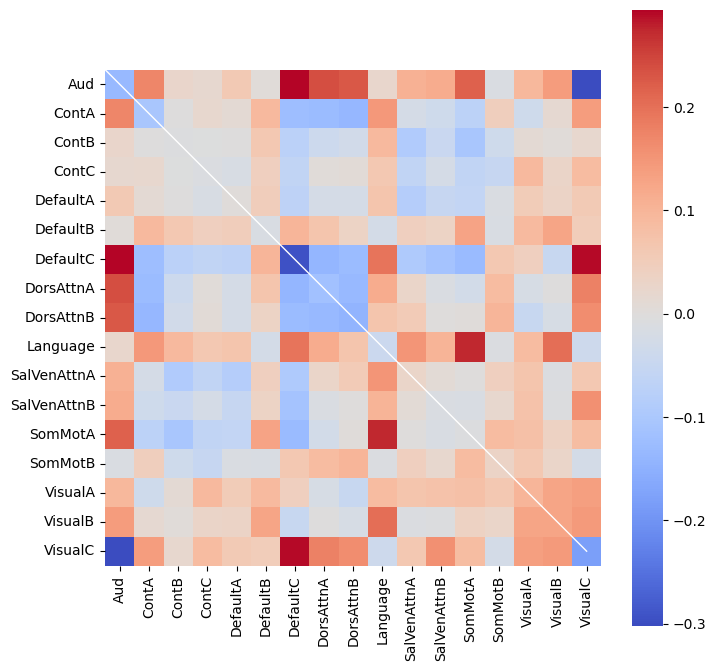

Segment: 4


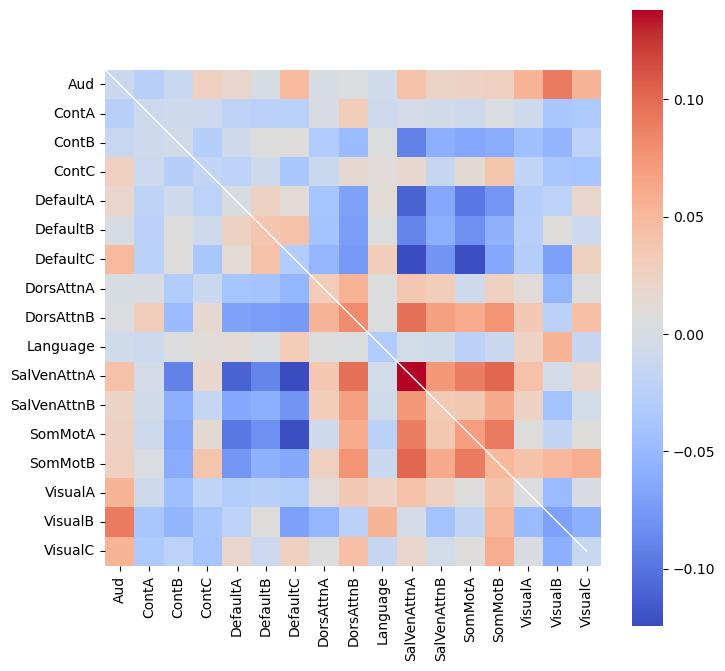

Segment: 5


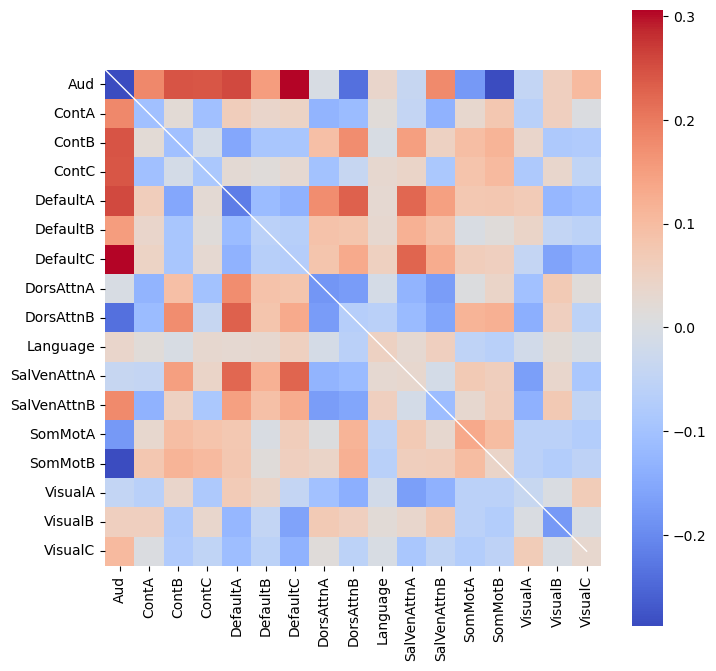

Segment: 6


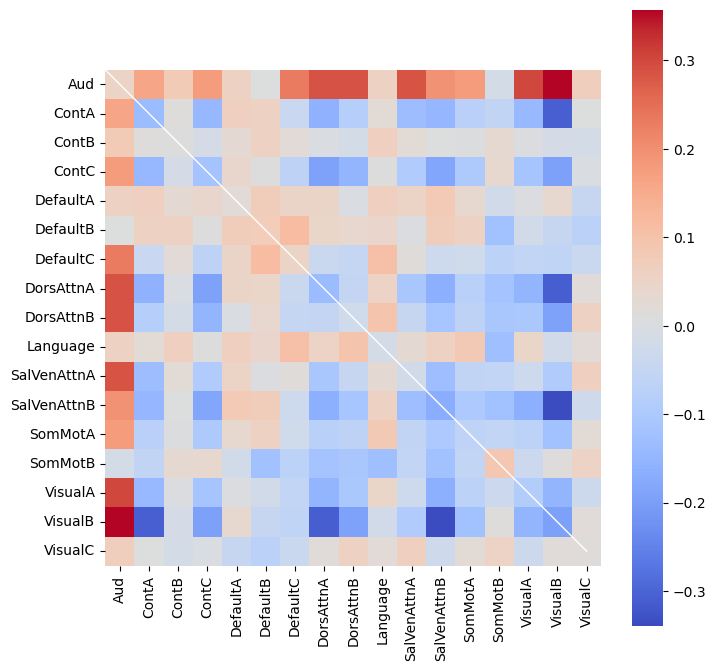

Segment: 7


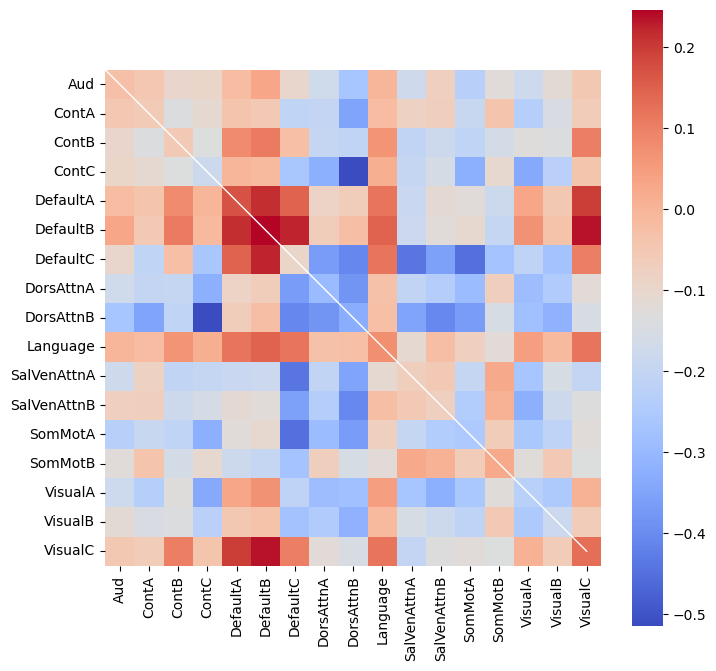

Segment: 8


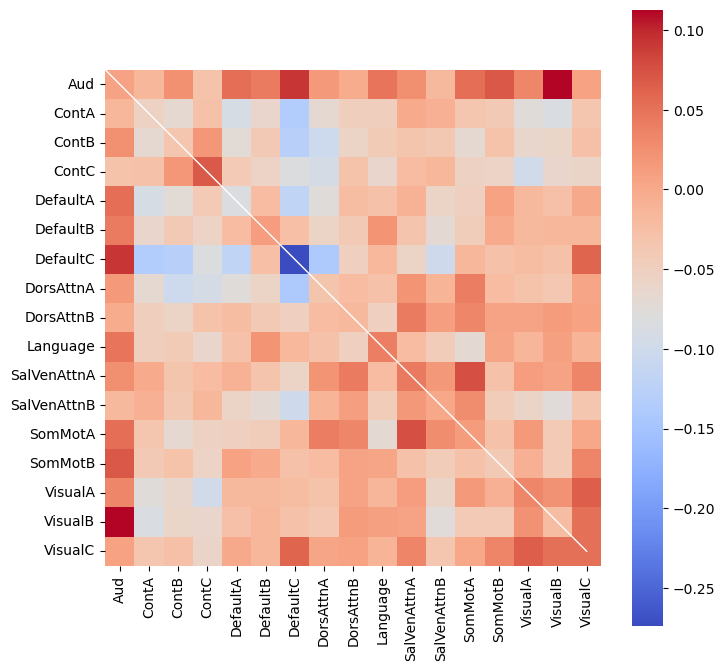

Segment: 9


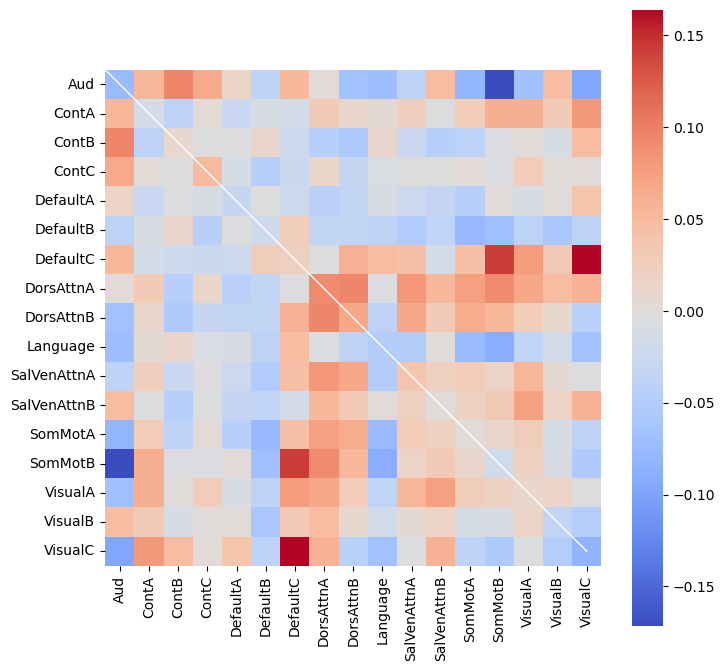

Segment: 10


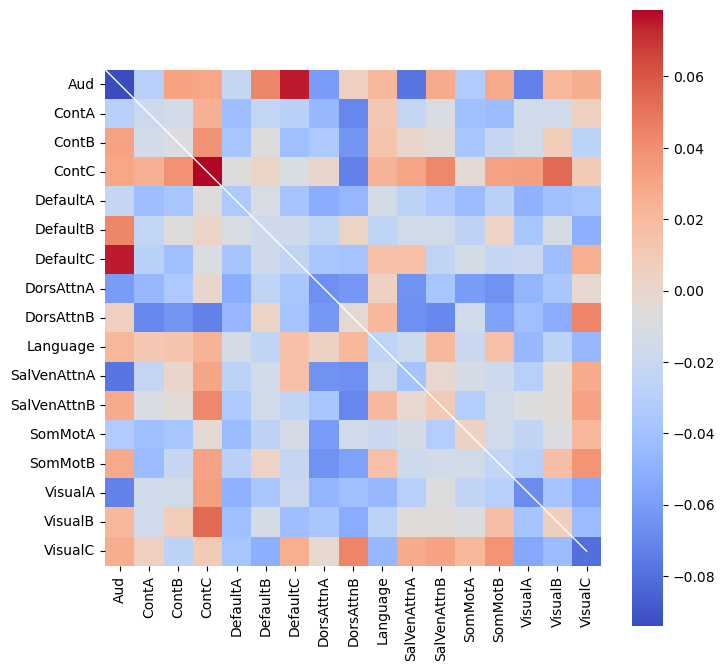

Segment: 11


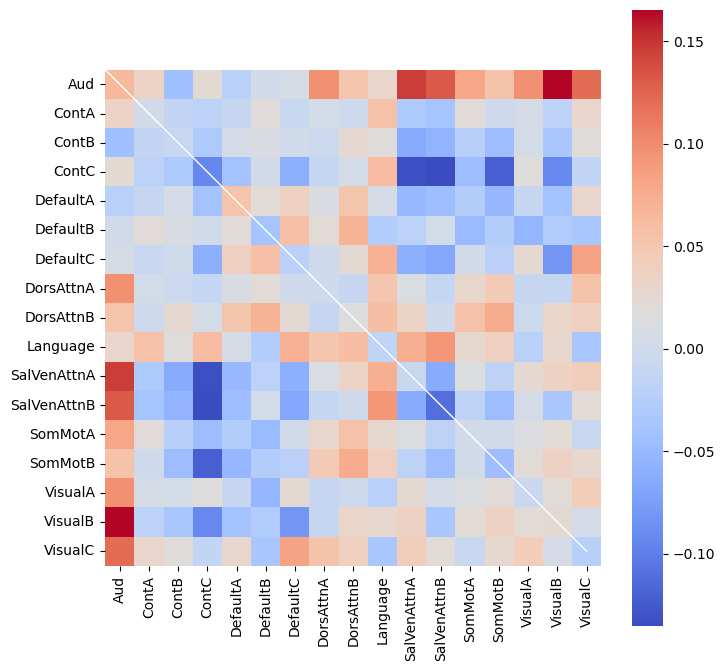

Segment: 12


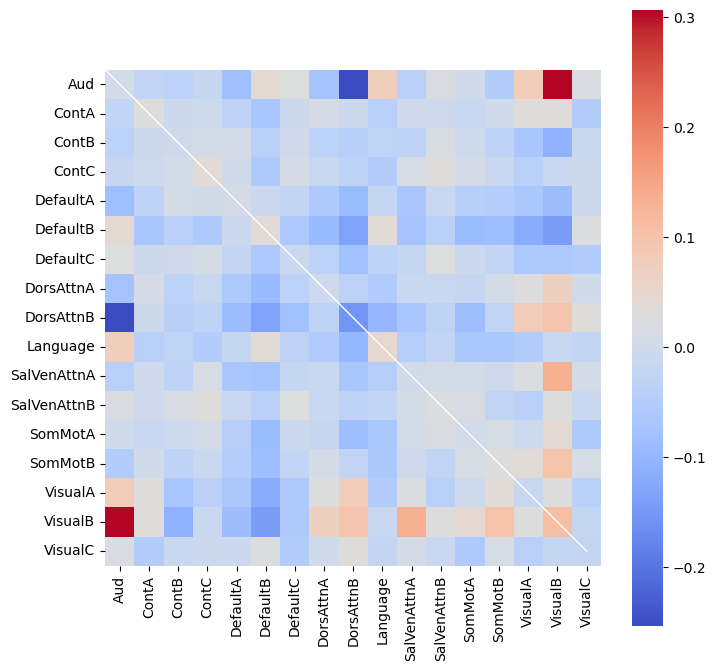

Segment: 13


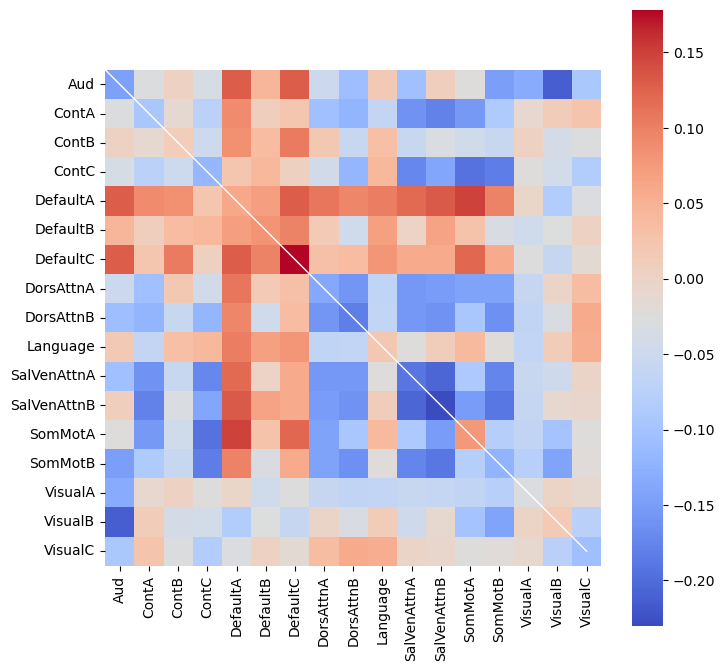

Segment: 14


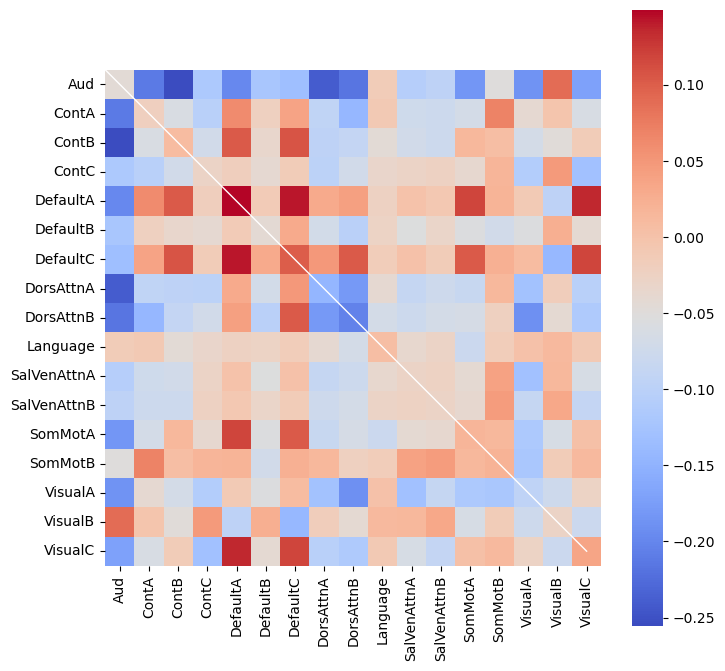

Segment: 15


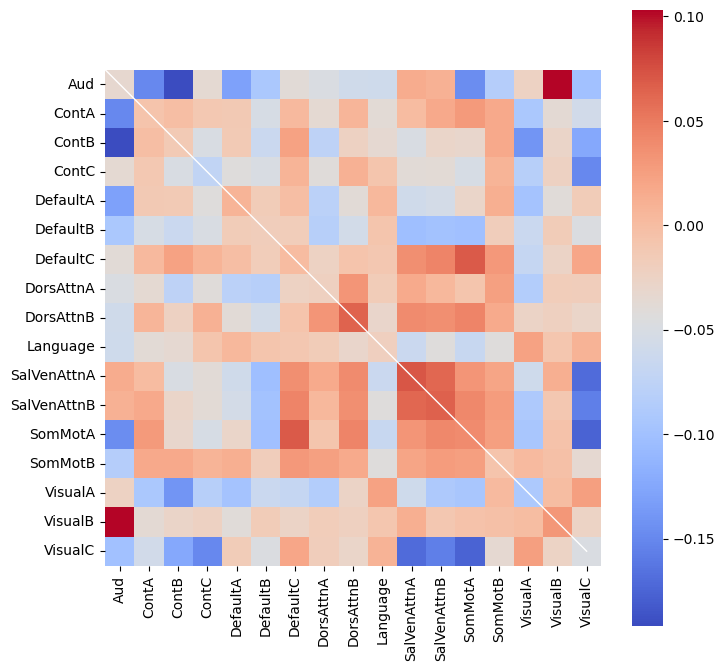

Segment: 16


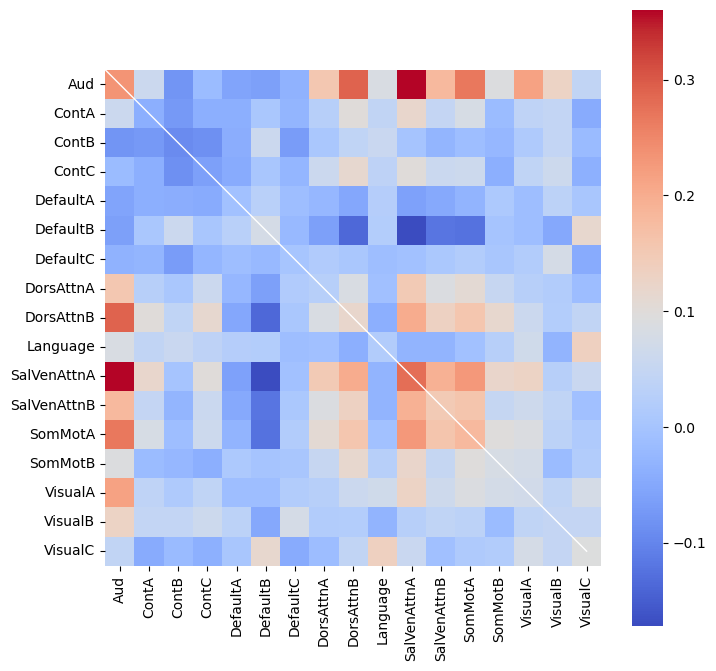

Segment: 17


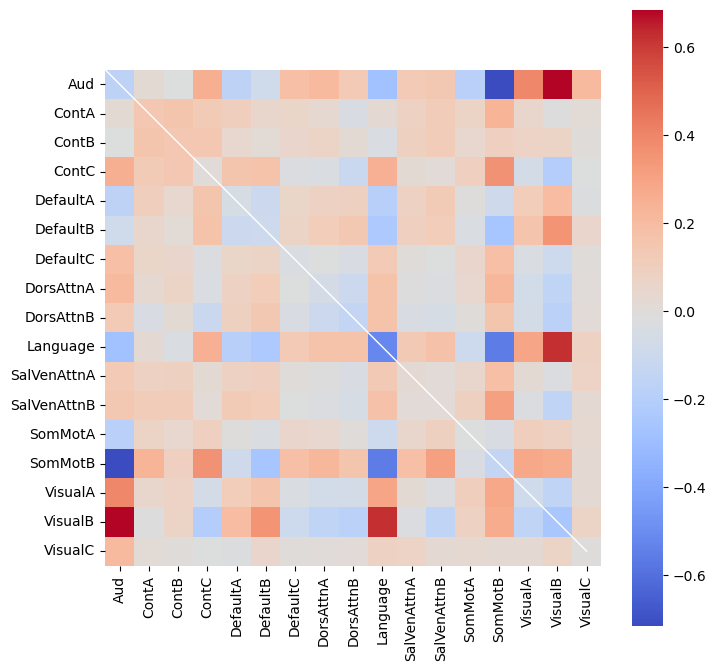

Segment: 18


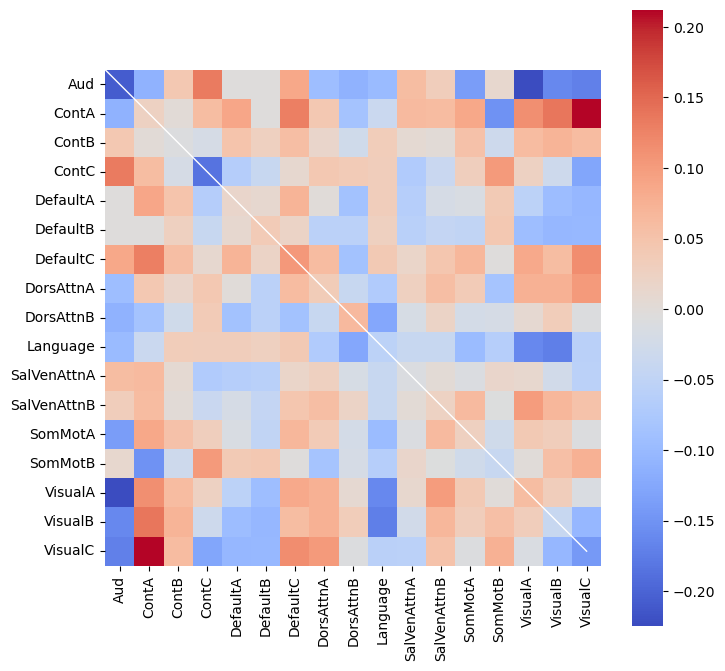

Segment: 19


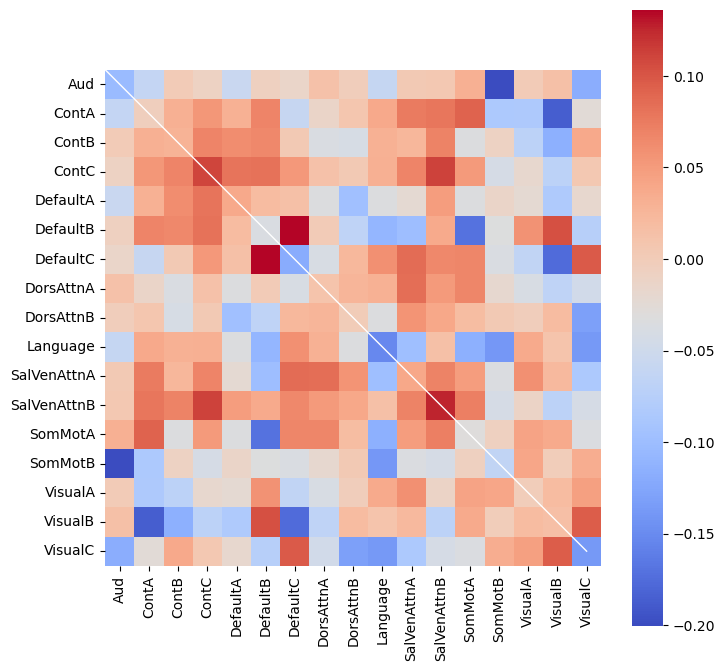

Segment: 20


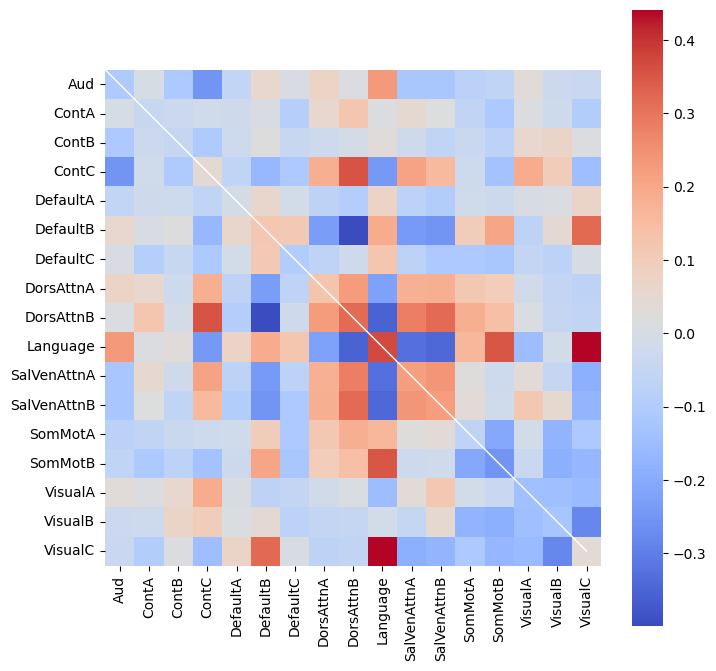

Segment: 21


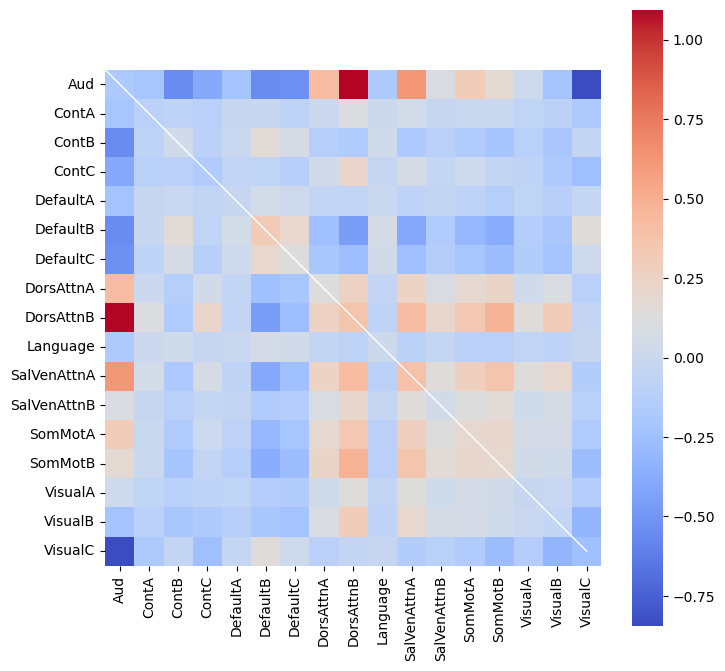

Segment: 22


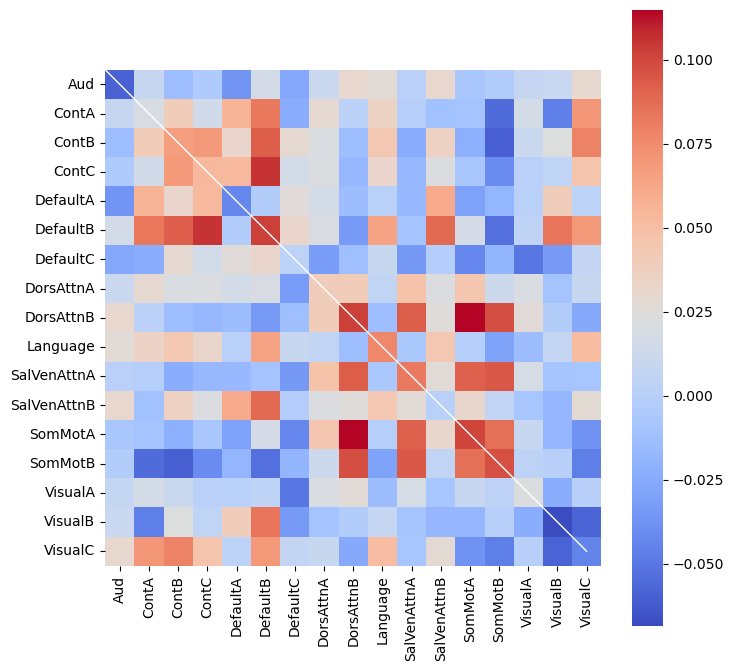

Segment: 23


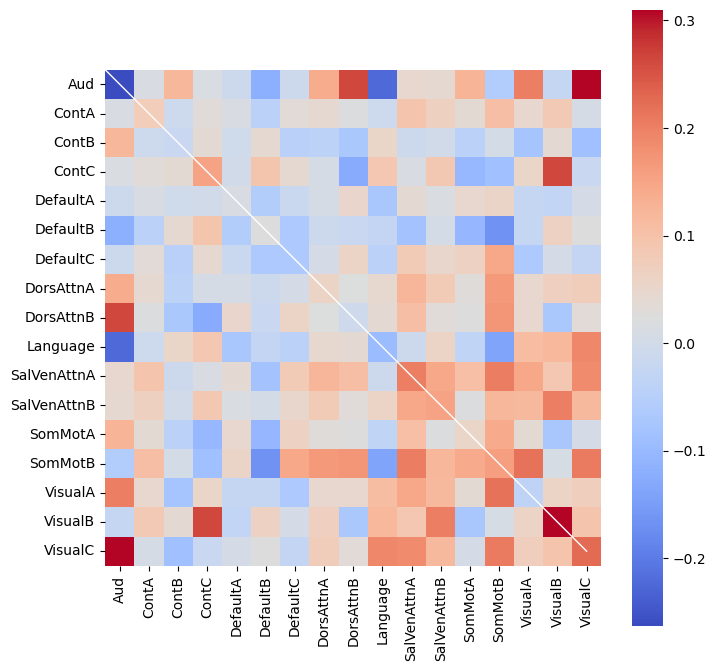

Segment: 24


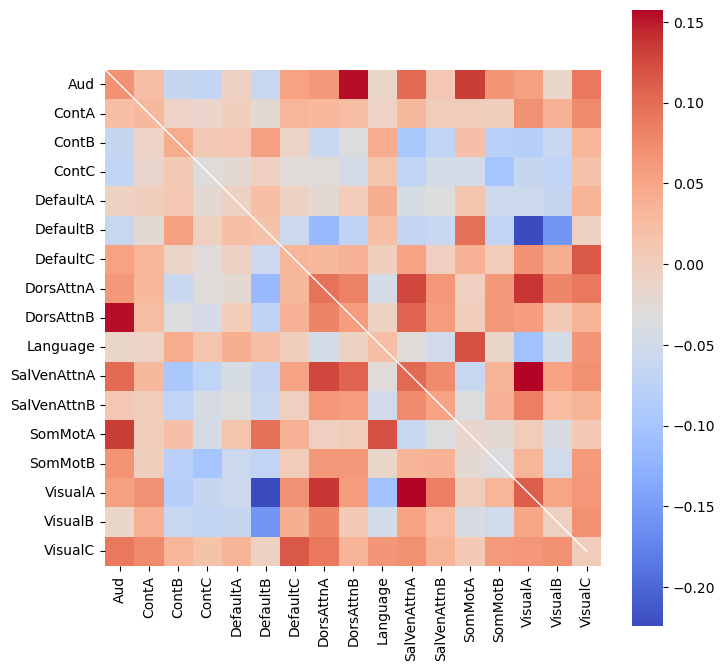

In [35]:
for i in range(n_seg):
    print(f"Segment: {i+1}")
    fig = plt.figure(figsize=(8, 8))
    ax = sns.heatmap(diff_mtx_ntw[:, :, i], cmap="coolwarm", square=True)
    plt.xticks(np.arange(0.5, 17.5, 1), networknames_idx_dict.keys(), rotation=90)
    plt.yticks(np.arange(0.5, 17.5, 1), networknames_idx_dict.keys(), rotation=0)

    # Draw a diagonal line from top left to bottom right
    ax.plot([-0.5, len(networknames_idx_dict)-0.5], [-0.5, len(networknames_idx_dict)-0.5], color='white', linewidth=1)

    plt.show()